First prompt:

Implement a code to compute the expected calibration error. Then create dummy data and test the function on it. The implementation should be vectorized using Numpy library and avoid using for loops.

```python
import numpy as np


def expected_calibration_error(y_true, y_pred_prob, num_bins=10):
    """
    Compute the Expected Calibration Error (ECE) for binary classification problems.

    Parameters:
    y_true (array): True labels of shape (n_samples,)
    y_pred_prob (array): Predicted probabilities of shape (n_samples,)
    num_bins (int): Number of bins to discretize the predicted probabilities. Default is 10.

    Returns:
    ece (float): Expected Calibration Error.
    """

    # Ensure inputs are numpy arrays
    y_true = np.array(y_true)
    y_pred_prob = np.array(y_pred_prob)

    # Clip predicted probabilities to [0, 1]
    y_pred_prob = np.clip(y_pred_prob, 0, 1)

    # Discretize predicted probabilities into bins
    bin_edges = np.linspace(0, 1, num_bins + 1)
    bin_idx = np.digitize(y_pred_prob, bin_edges, right=True) - 1

    # Compute the observed frequency and predicted confidence for each bin
    bin_obs_freq = np.bincount(
        bin_idx, weights=y_true, minlength=num_bins
    ) / np.bincount(bin_idx, minlength=num_bins)
    bin_pred_conf = np.bincount(
        bin_idx, weights=y_pred_prob, minlength=num_bins
    ) / np.bincount(bin_idx, minlength=num_bins)

    # Compute the absolute difference between observed frequency and predicted confidence for each bin
    bin_abs_diff = np.abs(bin_obs_freq - bin_pred_conf)

    # Compute the expected calibration error by taking the weighted average of absolute differences
    ece = np.sum(bin_abs_diff * np.bincount(bin_idx, minlength=num_bins)) / len(y_true)

    return ece


# Create dummy data
np.random.seed(42)
y_true = np.random.randint(0, 2, size=1000)
y_pred_prob = np.random.uniform(0, 1, size=1000)

# Test the function
ece = expected_calibration_error(y_true, y_pred_prob)
print("Expected Calibration Error:", ece)
```

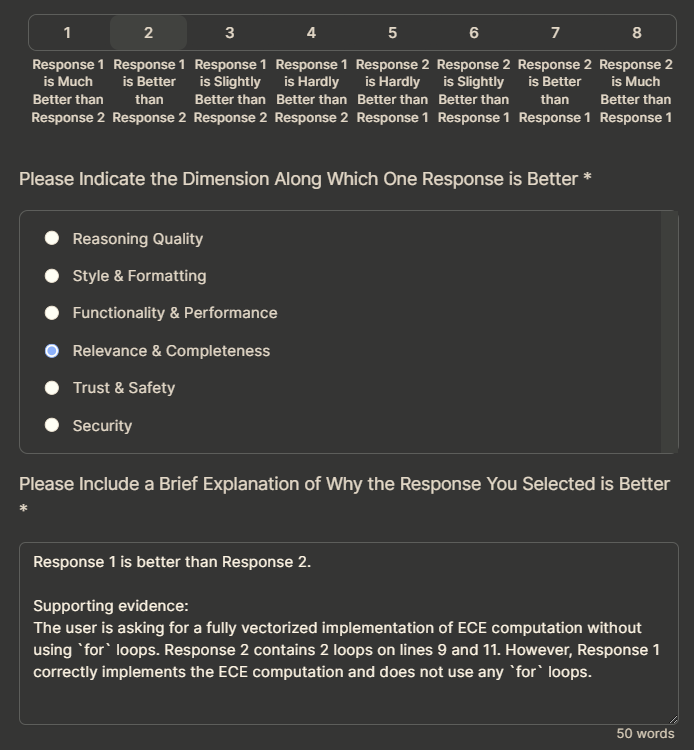

2 n 2 n

2nd prompt:

I want to test this implementation against `sklearn` implementation. Compute ECE over the dummy data using both methods and assert that they are close to each other.

Here's how you can test the implementation against `sklearn` implementation:

```python
import numpy as np
from sklearn.calibration import calibration_curve
from sklearn.metrics import accuracy_score

def expected_calibration_error(y_true, y_pred_prob, num_bins=10):
    """
    Compute the Expected Calibration Error (ECE) for binary classification problems.

    Parameters:
    y_true (array): True labels of shape (n_samples,)
    y_pred_prob (array): Predicted probabilities of shape (n_samples,)
    num_bins (int): Number of bins to discretize the predicted probabilities. Default is 10.

    Returns:
    ece (float): Expected Calibration Error.
    """

    # Ensure inputs are numpy arrays
    y_true = np.array(y_true)
    y_pred_prob = np.array(y_pred_prob)

    # Clip predicted probabilities to [0, 1]
    y_pred_prob = np.clip(y_pred_prob, 0, 1)

    # Discretize predicted probabilities into bins
    bin_edges = np.linspace(0, 1, num_bins + 1)
    bin_idx = np.digitize(y_pred_prob, bin_edges, right=True) - 1

    # Compute the observed frequency and predicted confidence for each bin
    bin_obs_freq = np.bincount(bin_idx, weights=y_true, minlength=num_bins) / np.bincount(bin_idx, minlength=num_bins)
    bin_pred_conf = np.bincount(bin_idx, weights=y_pred_prob, minlength=num_bins) / np.bincount(bin_idx, minlength=num_bins)

    # Compute the absolute difference between observed frequency and predicted confidence for each bin
    bin_abs_diff = np.abs(bin_obs_freq - bin_pred_conf)

    # Compute the expected calibration error by taking the weighted average of absolute differences
    ece = np.sum(bin_abs_diff * np.bincount(bin_idx, minlength=num_bins)) / len(y_true)

    return ece


# Create dummy data
np.random.seed(42)
y_true = np.random.randint(0, 2, size=1000)
y_pred_prob = np.random.uniform(0, 1, size=1000)

# Compute ECE using custom implementation
ece_custom = expected_calibration_error(y_true, y_pred_prob)

# Compute ECE using sklearn implementation
fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_pred_prob, n_bins=10)
ece_sklearn = np.sum(np.abs(fraction_of_positives - mean_predicted_value) * np.bincount(np.digitize(y_pred_prob, np.linspace(0, 1, 11), right=True) - 1)) / len(y_true)

# Assert that both implementations produce similar results
assert np.isclose(ece_custom, ece_sklearn, atol=1e-6), "ECE values do not match"

print("Custom ECE:", ece_custom)
print("Sklearn ECE:", ece_sklearn)
```

In this code, we first compute the ECE using our custom implementation. Then, we use `sklearn.calibration.calibration_curve` to compute the ECE using `sklearn` implementation. We then assert that both implementations produce similar results using `np.isclose`. If the assertion passes, it means that our custom implementation is correct.

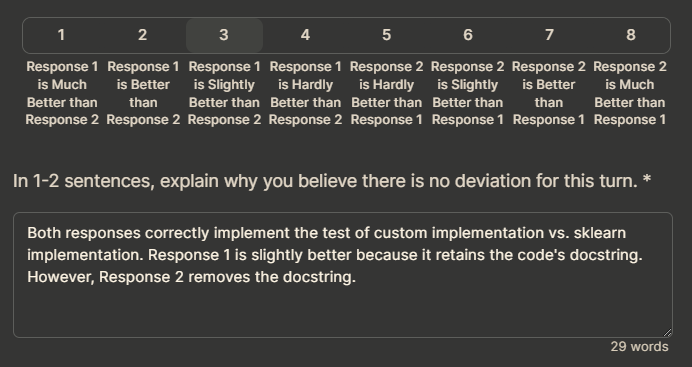

2 n 2 n

## Quality of the task

2 n

## Feedback

Hello, dear Tasker. Thanks a lot for your commitment to the actual project.
I reviewed your work and wanted to share my thoughts.

According to actual Guidelines, your prompts are a bit too vague and do not expose the model to a complex situation where it would develop its maximum efforts to generate good responses. These prompts must be innovative and creative, which are subjective things to consider, but there are also some factual or objective items to think about:
  - Use cases: propose uses for the code to be useful within specific situations
  - Context: giving some environmental information will buff your prompt as the model has information to be more specific and clever
  - Constraints: adding extra spice to the model is a good way to increase its quality. Think about specific limitations to take into account or restrictions that would make the problem non-trivial.

Another topic to engage in is justifications: in the documentation, there's plenty of information to learn some workflow in order to tackle this. I'll add them at the end for you to later consults.
When working around deviations or significant differences between responses, you must always apply the dimension priorities. They do not weigh all the same, that is, there are some that are more relevant to the project. This is present in the other document that I'll attach at the end.

With all this, I truly believe you can develop perfect stellar prompts that would make the model thrive to create astonishing responses.

Thanks a lot for reading till the end! I wish you the best on this, I know you have what is needed for the project!

* Documentation:

* Flamingo Crash Course:
https://docs.google.com/document/d/1djY7NcldjU21bRYCX6hoFHrrQSPQ5C_o0d_XDJnNUmY/edit#heading=h.3ibr2go7c4fs

* Dimension Priorities:
https://docs.google.com/document/d/1XtlJbL3WuvMBqKvqSmRHVCujy_fvDrluiKOzR5I0qO4/edit